<a href="https://colab.research.google.com/github/Mohammadi-Nilofer/ML-assignments/blob/KNN/KNN_Obesity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification using KNN

**Context**

This dataset contains information about the obesity classification of individuals. The data was collected from a variety of sources, including medical records, surveys, and self-reported data


**Objective:**

To develop a decision tree model that accurately predicts the obesity classification of individuals.


**Data Dictionary:**

ID: A unique identifier for each individual

Age: The age of the individual

Gender: The gender of the individual

Height: The height of the individual in centimeters

Weight: The weight of the individual in kilograms

BMI: The body mass index of the individual, calculated as weight divided by height squared

Label: The obesity classification of the individual, which can be one of the following:
* Normal Weight
* Overweight
* Obese
* Underweight

#Importing all necessary libraries

In [ ]:
import pandas as pd   # for data manipulation
import numpy as np

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Splitting the data into train and test
from sklearn.model_selection import train_test_split

#To check the performance of the model
from sklearn import metrics

#for preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

#Loading the data set

In [ ]:
df=pd.read_csv('/content/Obesity Classification.csv')
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


**Checking the info of the dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


**Observations:**

Data types of all the columns are in correct format.

**Checking the null values**

In [ ]:
df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Height,0
Weight,0
BMI,0
Label,0


**Observation:**
There are no null values in the data set.

**Checking for duplicates**

In [ ]:
df.duplicated().sum()

np.int64(0)

Observation: There are no duplicate values in the dataset

#Exploratory Data Analysis

**Checking Summary Statistics**

In [ ]:
df.describe()

,ID,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,166.574074,59.490741,20.549074
std,31.917939,24.720620,27.873615,28.856233,7.583818
min,1.000000,11.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,190.000000,85.000000,26.100000
max,110.000000,112.000000,210.000000,120.000000,37.200000


**Observation:**

* From 'age' column, we can observe that the mean is significantly greater than median which implies there are some outliers in the right tail.
* From 'Height' column, we can observe that the median is significantly greater than mean which implies there are some outliers in the left tail.

* From 'weight' column, we can observe that the mean is significantly greater than median which implies there are some outliers in the right tail.
* From 'BMI' column, we can see that mean and median are almost same which implies data is symmetrically distributed.

**Boxplot for numerical columns**

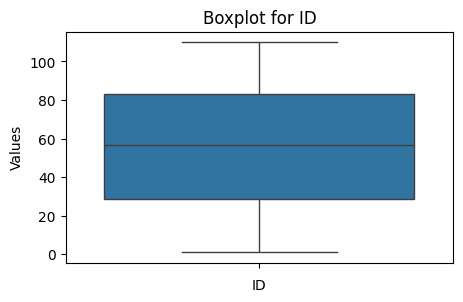

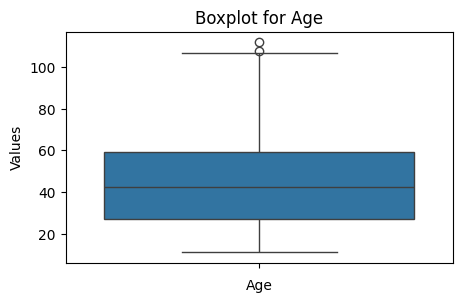

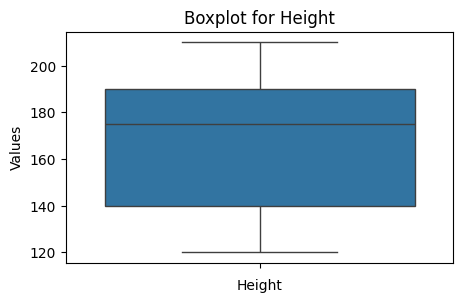

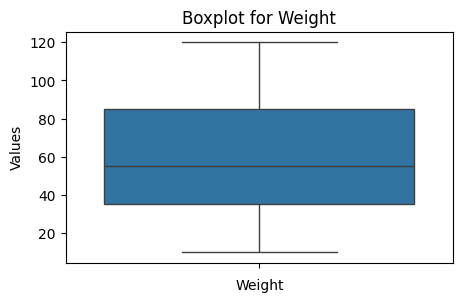

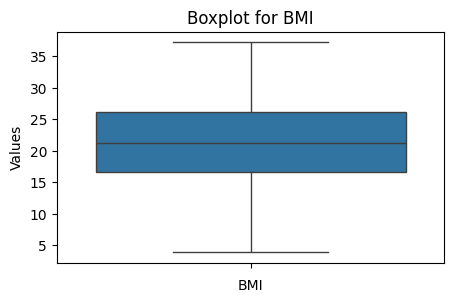

In [ ]:
for col in df.select_dtypes(include=np.number):
  plt.figure(figsize=(5,3))
  sns.boxplot(df[col])
  plt.title(f'Boxplot for {col}')
  plt.xlabel(col)
  plt.ylabel('Values')
  plt.show()

**Observation:**

* There no outliers in height, weight, and BMI columns.
* There are very few outliers in the Age column.

#Data Visualization

**Univariate Analysis**

**Countplot for label column**

<Axes: xlabel='count', ylabel='Label'>

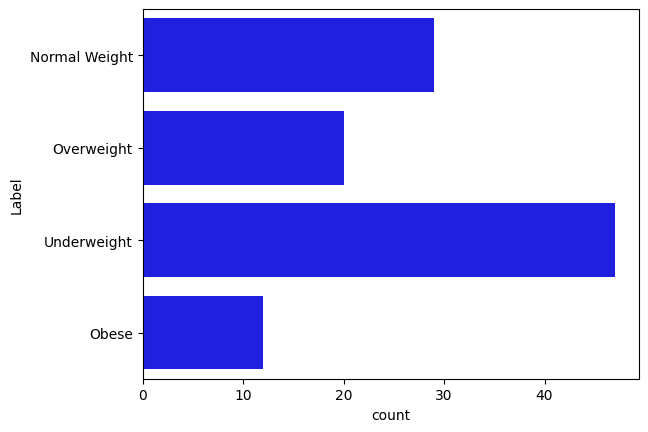

In [ ]:
sns.countplot(df['Label'],color='blue')

**Observations:**
* From the countplot, we can see that the most number of people are underweight,followed by Normal weight and over weight.
* we can observe that number of people underweight are significantly more than obese people.
*  Fewest people are Obese.


**Bi-variate Analysis**

<Axes: xlabel='BMI', ylabel='Label'>

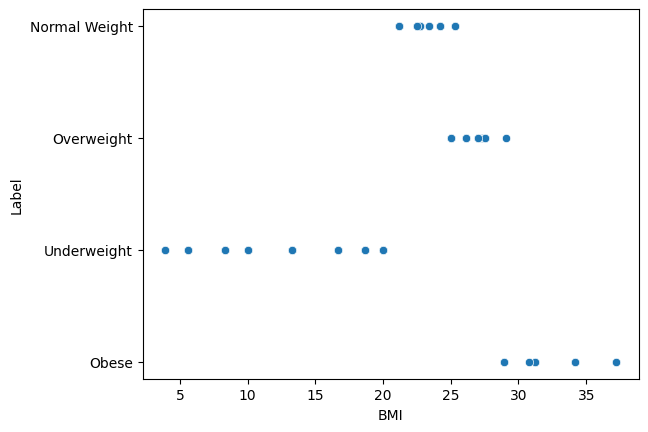

In [ ]:
# Scatter plot of BMI and label.

sns.scatterplot(x='BMI',y='Label',data=df)

**Observations:**

* We can observe that the people with BMI less than or equal to 20 are labeled as Underweight.
* We can Observe that the people with BMI ranges between 22 to 28 are labeled as Normal weight.
* People with around BMI range of 25 to 28 people are labeled as Overweight.
* Finally, the people with BMI range around 28 and above are labeled as Obese.
* This implies BMI is correlated to Labels.

#Preprocessing the data

In [ ]:
df.columns

Index(['ID', 'Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label'], dtype='object')

In [ ]:
df.loc[df['Gender']=='Female','Gender']=0
df.loc[df['Gender']=='Male','Gender']=1

In [ ]:
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,1,175,80,25.3,Normal Weight
1,2,30,0,160,60,22.5,Normal Weight
2,3,35,1,180,90,27.3,Overweight
3,4,40,0,150,50,20.0,Underweight
4,5,45,1,190,100,31.2,Obese


**One_hot_Encoding**

In [ ]:
# use label encoder to convert species into numbers

label_encoder = preprocessing.LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

In [ ]:
#df=pd.get_dummies(df,columns=['Label'])
#df.head()

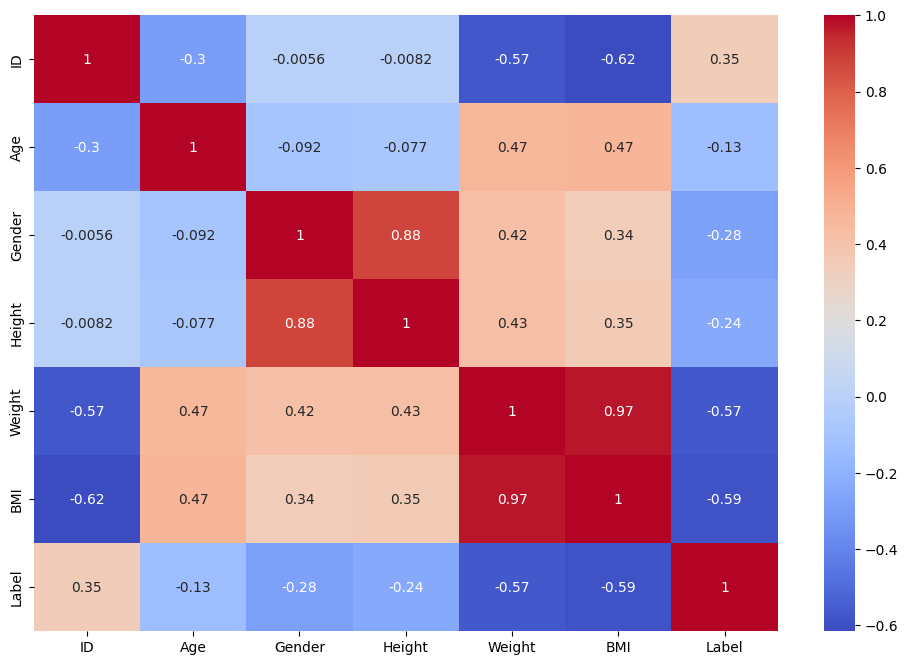

In [ ]:
#Heatmap for correlation
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

**Observations:**
* From the above heatmap we can observe that weight and BMI has strong positive correlation.
* Height and Gender columns are also positively correlated.
* Weight and BMI columns has negative correlation with Label.

# Model Building

In [ ]:
#Dropping Id column
df=df.drop('ID',axis=1)

In [ ]:
df.head()

,Age,Gender,Height,Weight,BMI,Label
0,25,1,175,80,25.3,0
1,30,0,160,60,22.5,0
2,35,1,180,90,27.3,2
3,40,0,150,50,20.0,3
4,45,1,190,100,31.2,1


**Separating the independent variables (X) and the dependent variable (Y)**

In [ ]:
X=df.drop('Label',axis=1)
y=df['Label']

In [ ]:
X

,Age,Gender,Height,Weight,BMI
0,25,1,175,80,25.3
1,30,0,160,60,22.5
2,35,1,180,90,27.3
3,40,0,150,50,20.0
4,45,1,190,100,31.2
...,...,...,...,...,...
103,11,1,175,10,3.9
104,16,0,160,10,3.9
105,21,1,180,15,5.6
106,26,0,150,15,5.6


In [ ]:
y

,Label
0,0
1,0
2,2
3,3
4,1
...,...
103,3
104,3
105,3
106,3


**Splitting the data into train and test**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((86, 5), (22, 5), (86,), (22,))

In [ ]:
X_test

,Age,Gender,Height,Weight,BMI
77,60,0,120,70,23.4
10,18,1,175,70,23.4
4,45,1,190,100,31.2
83,13,1,175,25,10.0
62,36,1,190,75,24.2
67,61,0,120,75,25.0
30,24,0,160,55,21.2
45,52,0,130,75,25.0
95,22,1,180,20,8.3
11,23,0,160,50,20.0


In [ ]:
y_test

,Label
77,0
10,0
4,1
83,3
62,0
67,2
30,0
45,2
95,3
11,3


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Searching for optimal values of K
from sklearn.model_selection import cross_val_score
#list the scores from k_range
k_range=range(1,10)
k_scores=[]

#Looping through the values
for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  scores=cross_val_score(knn,X_train,y_train,cv=5,scoring ='accuracy')
  k_scores.append(scores.mean())

In [ ]:
#Printing the scores
print(k_scores)

[np.float64(0.8601307189542483), np.float64(0.7908496732026143), np.float64(0.8836601307189543), np.float64(0.8019607843137255), np.float64(0.8594771241830065), np.float64(0.7915032679738563), np.float64(0.826797385620915), np.float64(0.8150326797385621), np.float64(0.7797385620915033)]


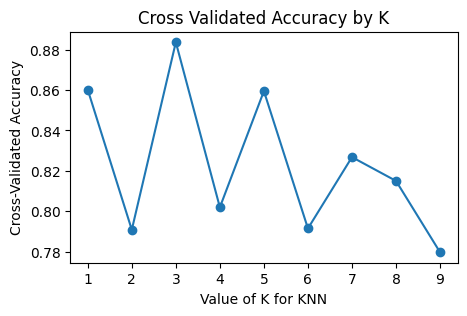

In [ ]:

#plotting the value of k for KNN
plt.figure(figsize=(5,3))
plt.plot(k_range, k_scores, marker= 'o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross Validated Accuracy by K')
plt.show()

In [ ]:
#Optimum model
knn=KNeighborsClassifier(n_neighbors=3)

#Fitting the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#Taking predictions from the model
y_train_pred=knn.predict(X_train)
y_test_pred=knn.predict(X_test)

In [ ]:
#Evaluating the model
print('Training Accuracy :',metrics.accuracy_score(y_train,y_train_pred))
print('Training Precision :',np.round(metrics.precision_score(y_train,y_train_pred, average ='weighted'),2))
print('Training Recall :',np.round(metrics.recall_score(y_train,y_train_pred, average ='weighted'),2))
print('Training F1 score :',np.round(metrics.f1_score(y_train,y_train_pred, average ='weighted'),2))




print('\nTesting Accuracy :',metrics.accuracy_score(y_test,y_test_pred))
print('Testing Precision :',np.round(metrics.precision_score(y_test,y_test_pred, average ='weighted'),2))
print('Testing Recall :',np.round(metrics.recall_score(y_test,y_test_pred, average ='weighted'),2))
print('Testing F1 score :',np.round(metrics.f1_score(y_test,y_test_pred, average ='weighted'),2))

Training Accuracy : 0.9302325581395349
Training Precision : 0.93
Training Recall : 0.93
Training F1 score : 0.93

Training Accuracy : 0.9545454545454546
Training Precision : 0.96
Training Recall : 0.95
Training F1 score : 0.95


**Observations:**

The KNN classifier model, with k=3, demonstrated excellent performance on the obesity dataset. It achieved high accuracy, precision, recall, and F1-score on both the training and testing sets. This suggests the model has successfully learned the underlying patterns in the data and is able to generalize well to unseen data.

# Conclusions:

* A KNN classifier model was built to predict obesity classification using the obesity dataset.
* The model achieved a training accuracy of 93% and a testing accuracy of 95%.
*The model also achieved high precision, recall, and F1-score on both the training and testing sets.
*These results indicate the model is a strong predictor of obesity classification.